PACKAGE IMPORT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

UNZIP


In [ ]:
!unzip '/content/drive/My Drive/Covid19_dataset.zip'

Archive:  /content/drive/My Drive/Covid19_dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
 

SETTING PATH

In [ ]:
train_path='/content/Covid19-dataset/train'
test_path='/content/Covid19-dataset/test'

DATA AGUMENTATION

In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip = True,
    vertical_flip = True,
    # rotation_range=15,
    # zoom_range=0.2
)
training_set=data_gen.flow_from_directory(directory = train_path,

    target_size = (224,224), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True
)
testing_set=data_gen.flow_from_directory(directory = test_path,
    color_mode="rgb",
    target_size = (224,224), # image height , image width
    class_mode="categorical",
    batch_size=16,
    shuffle=True
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


MODEL MAKING

In [ ]:
tf.random.set_seed(1234)
model=Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256,activation='relu'),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')]
)




MODEL COMPILE

In [ ]:
# model.compile(
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=tf.keras.optimizers.RMSprop(0.01),metrics=["accuracy"]
# )/

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='categorical_crossentropy',metrics=['accuracy']
    )

FITING MODEL

In [ ]:
history = model.fit(training_set,
                              validation_data=testing_set,
                              epochs=10,
                    )

Epoch 1/10
8/8 [==============================] - 19s 2s/step - loss: 0.3871 - accuracy: 0.8526 - val_loss: 0.6705 - val_accuracy: 0.7121
Epoch 2/10
8/8 [==============================] - 18s 2s/step - loss: 0.3255 - accuracy: 0.8606 - val_loss: 0.4943 - val_accuracy: 0.7879
Epoch 3/10
8/8 [==============================] - 20s 2s/step - loss: 0.2752 - accuracy: 0.8725 - val_loss: 0.3840 - val_accuracy: 0.7879
Epoch 4/10
8/8 [==============================] - 17s 2s/step - loss: 0.3607 - accuracy: 0.8526 - val_loss: 0.5895 - val_accuracy: 0.8182
Epoch 5/10
8/8 [==============================] - 18s 2s/step - loss: 0.2821 - accuracy: 0.8884 - val_loss: 0.6325 - val_accuracy: 0.7424
Epoch 6/10
8/8 [==============================] - 18s 2s/step - loss: 0.2215 - accuracy: 0.9243 - val_loss: 0.3091 - val_accuracy: 0.9091
Epoch 7/10
8/8 [==============================] - 30s 4s/step - loss: 0.2511 - accuracy: 0.8884 - val_loss: 0.3760 - val_accuracy: 0.8939
Epoch 8/10
8/8 [==================

GRAPHS

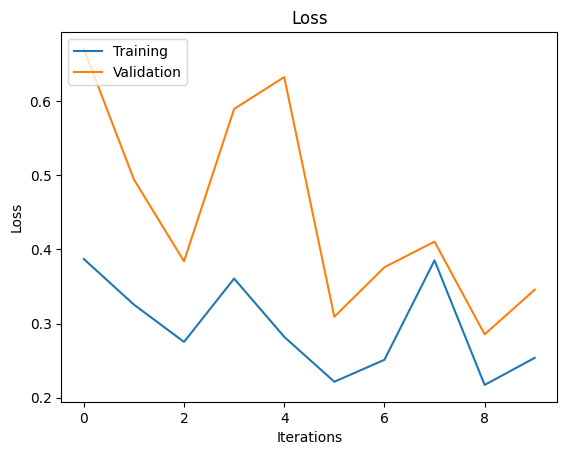

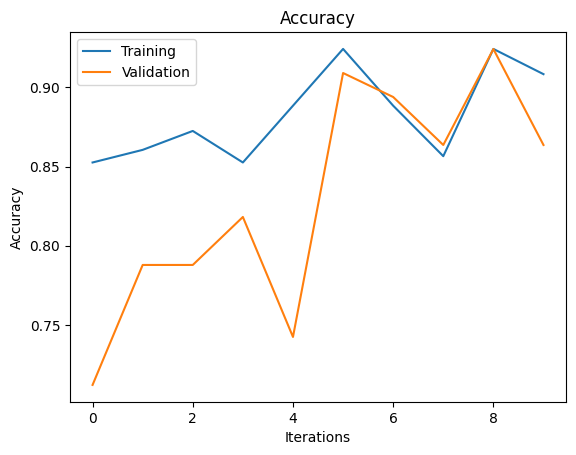

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()